<a href="https://colab.research.google.com/github/Aakash1095/EDA-capstone-project/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px

In [4]:
# Defining the path for data file
path = '/content/drive/MyDrive/Hotel Bookings.csv'

In [5]:
# Reading the data file
df = pd.read_csv(path)

In [6]:
# Printing the head
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Looking the shape of the dataframe
df.shape

(119390, 32)

In [8]:
# Looking for the descriptive stats
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [9]:
# Looking at the datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# Looking at the null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df[['children','country','agent','company']]

,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN
2,0.0,GBR,NaN,NaN
3,0.0,GBR,304.0,NaN
4,0.0,GBR,240.0,NaN
...,...,...,...,...
119385,0.0,BEL,394.0,NaN
119386,0.0,FRA,9.0,NaN
119387,0.0,DEU,9.0,NaN
119388,0.0,GBR,89.0,NaN


# **Data Preprocessing**






In [12]:
# Making a copy of the dataframe
df_hotel = df.copy()

In [13]:
df_hotel.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [14]:
# Filling the null values with '0' as the respective columns only contains the id of the agent and company
df_hotel['company'].fillna(0.0, inplace=True)
df_hotel['agent'].fillna(0.0, inplace=True)

In [15]:
df_hotel.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [16]:
# Filling the null values with mode
df_hotel['country'].fillna(df_hotel.country.mode().to_string(), inplace=True)

In [17]:
df_hotel['country'].isnull().sum()

0

In [18]:
# Filling the null values with mean
df_hotel['children'].fillna(round(df_hotel.children.mean()), inplace=True)

In [19]:
df_hotel['children'].isnull().sum()

0

In [20]:
df_hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [21]:
# Looking for the rows having guest as '0'
df_hotel[(df_hotel['adults']==0) & (df_hotel['children']==0) & (df_hotel['babies']== 0)].shape

(180, 32)

In [22]:
# Droping the rows having guest as '0'
df_hotel = df_hotel.drop(df_hotel[(df_hotel['adults']==0) & (df_hotel['children']==0) & (df_hotel['babies']== 0)].index)

In [23]:
df_hotel.shape

(119210, 32)

In [24]:
# Changing the datatype
df_hotel[['children', 'company', 'agent']] = df_hotel[['children', 'company', 'agent']].astype('int64')

In [25]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

# **EDA**

In [26]:
# Making a new feature as 'Room' which has the info about wheather the guest has provided with same room as booked or not.
df_hotel['Room'] = 0
df_hotel.loc[ df_hotel['reserved_room_type'] == df_hotel['assigned_room_type'] , 'Room'] = 1

In [27]:
df_hotel.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Room
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0


In [28]:
# Calculating the percentage of guests getting the rooms as per their preferences ('Different room = 0, Same room = 1')

same_room_allotment = df_hotel['Room'].value_counts()/len(df_hotel.Room)*100
same_room_allotment

1    87.58829
0    12.41171
Name: Room, dtype: float64

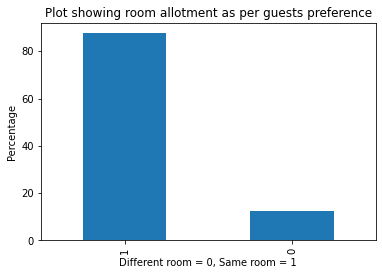

In [29]:
# Creating the Bar plot for Room allotment 

same_room_allotment.plot(kind='bar')

plt.title('Plot showing room allotment as per guests preference')
plt.ylabel('Percentage')
plt.xlabel('Different room = 0, Same room = 1')

plt.rcParams['figure.figsize'] = (10, 5)

**It shows that 87% of the guests got their preferred room.**

In [30]:
# Creating a feature 'total_nights' which gives the total weekend + weekdays nights spend by guests

df_hotel ['total_nights'] = df_hotel['stays_in_weekend_nights'] + df_hotel['stays_in_week_nights']


In [31]:
# It shows what prcentage of guests stayed for how many nights
 
percentage_total_nights_stayed = df_hotel[df_hotel['is_canceled']==0]['total_nights'].value_counts()/len(df_hotel['is_canceled'])*100
percentage_total_nights_stayed

1     13.198557
3     13.184297
2     12.977938
4      9.239997
7      4.763862
5      4.285714
6      1.942790
10     0.653469
8      0.598943
14     0.550289
0      0.521768
9      0.442077
11     0.229008
12     0.102340
13     0.075497
15     0.031038
21     0.030199
28     0.018455
16     0.015099
17     0.012583
25     0.011744
22     0.007550
18     0.005033
19     0.005033
35     0.004194
42     0.002517
23     0.001678
29     0.001678
30     0.001678
56     0.000839
20     0.000839
24     0.000839
34     0.000839
69     0.000839
38     0.000839
45     0.000839
46     0.000839
48     0.000839
60     0.000839
Name: total_nights, dtype: float64

In [32]:
df_hotel.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Room,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,0


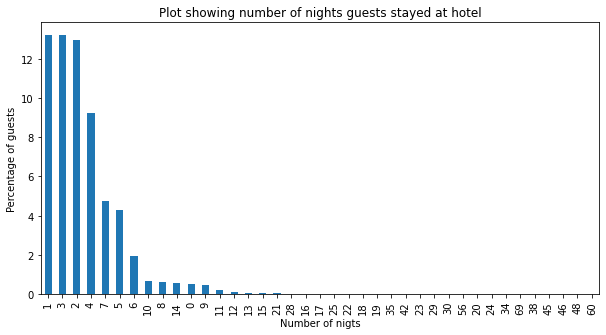

In [33]:
# Creating the Bar plot for  showing number of nights guests stayed at hotel

percentage_total_nights_stayed.plot(kind='bar')

plt.title('Plot showing number of nights guests stayed at hotel')
plt.ylabel('Percentage of guests')
plt.xlabel('Number of nigts')

plt.rcParams['figure.figsize'] = (10, 5)

**Most of the guests stayed at the hotel for 2 nights.**

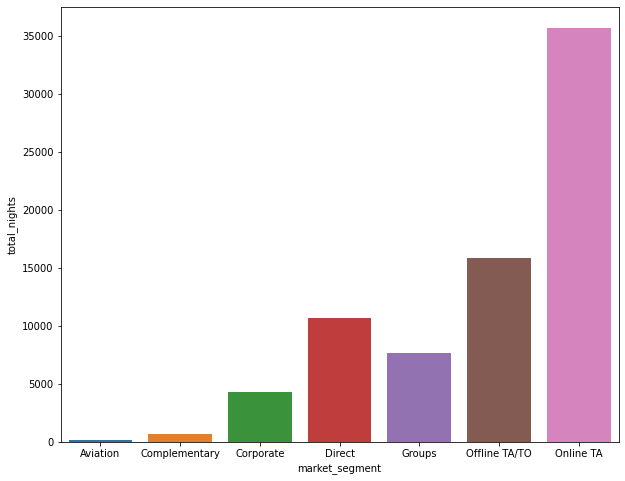

In [34]:
# Showing the prefernce of the guests to make bookings
plt.figure(figsize=(10,8))
sns.barplot(x=df_hotel[df_hotel['is_canceled']==0].groupby('market_segment')['total_nights'].count().index,
            y=df_hotel[df_hotel['is_canceled']==0].groupby('market_segment')['total_nights'].count())

**The online travel agents are preferred by the guests for reservation.**

In [35]:
# Looking for the different types of meal 
df_hotel['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f990c6aac90>,
 [Text(-0.7829805082673009, -0.9093632517720733, 'BB'),
  Text(1.035308156801985, 0.6067429607826338, 'HB'),
  Text(0.44697235165037347, 1.113649728083357, 'SC'),
  Text(0.09464342987967503, 1.2965502771511066, 'Undefined'),
  Text(0.03154253062649598, 1.4996683195832594, 'FB')],
 [Text(-0.45673862982259217, -0.5304618968670427, '77.37%'),
  Text(0.6039297581344911, 0.3539333937898697, '12.13%'),
  Text(0.2607338717960512, 0.6496290080486249, '8.85%'),
  Text(0.05824211069518462, 0.7978770936314502, '0.98%'),
  Text(0.02102835375099732, 0.9997788797221728, '0.67%')])

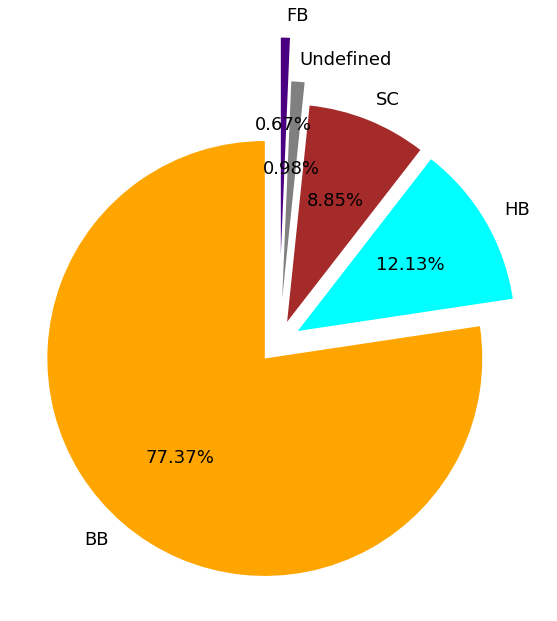

In [37]:
# Looking for the meals preferred by the guests

#configuring the pie chart
plt.rcParams['figure.figsize'] = 10,10

# Indexing labels. tolist() will convert the index to list
labels = df_hotel['meal'].value_counts().index.tolist()

# Convert value counts to list
sizes = df_hotel['meal'].value_counts().tolist()

# Explode will determine how much each section is separated from each other 
explode = (0.1, 0.1, 0.1,0.2,0.4)

# Determine colour of pie chart
colors = ( "orange", "cyan", "brown",
          "grey", "indigo")

#ploting the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%',startangle=90, textprops={'fontsize': 18})

**The pie chart shows that the guests prefered to booked meal BB Bed & Breakfast.**
